<a href="https://colab.research.google.com/github/kuhelidsen/data-science-projects/blob/main/deep-learning/Sen_Kuheli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**
**Kuheli Sen**


## **PartI**
### **Question1. Download the dataset that is about 2 GB from Kaggle into the local disk and unzip it.**

In [ ]:
# IMPORT LIBRARIES and PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import PIL #Python Imaging Library
import glob

# import tessorflow Libraries:
# FIRST run "pip install tensorflow_datasets" as tensorflow_datasets is a stand-alone pkg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
from glob import glob
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fix the seeds to reproduce the results:
import random
SEED = 101
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# IMPORT LIBRARIES and PACKAGES
from __future__ import absolute_import, division, print_function, unicode_literals
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt
import PIL #Python Imaging Library
from IPython.display import display  # display images
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

**I have saved the data in google drive and then mounted google drive to access the data:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
img_dir=Path('/content/drive/MyDrive/final_project/archive/indoorCVPR_09/Images')


**List the directories to double-check**

In [ ]:
total_files =0
for root, dirs, files in os.walk(str(img_dir)):
    level = root.replace(str(img_dir), '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/ ({len(files)} files)')
    total_files += len(files)
print(f'There are {total_files -1} images in this dataset')

Images/ (0 files)
    subway/ (539 files)
    trainstation/ (153 files)
    winecellar/ (289 files)
    inside_subway/ (489 files)
    auditorium/ (176 files)
    deli/ (273 files)
    buffet/ (111 files)
    closet/ (144 files)
    elevator/ (101 files)
    garage/ (113 files)
    airport_inside/ (650 files)
    kitchen/ (763 files)
    warehouse/ (538 files)
    bar/ (636 files)
    nursery/ (152 files)
    hairsalon/ (239 files)
    waitingroom/ (151 files)
    inside_bus/ (102 files)
    kindergarden/ (135 files)
    mall/ (186 files)
    museum/ (168 files)
    computerroom/ (114 files)
    videostore/ (110 files)
    gym/ (247 files)
    artstudio/ (140 files)
    studiomusic/ (116 files)
    operating_room/ (147 files)
    movietheater/ (189 files)
    poolinside/ (184 files)
    shoeshop/ (126 files)
    clothingstore/ (106 files)
    prisoncell/ (103 files)
    cloister/ (120 files)
    jewelleryshop/ (157 files)
    hospitalroom/ (101 files)
    classroom/ (133 files)
    fas

**Get the Indoor Image label using the Image directory**

In [ ]:
Indoor_dir = [ name for name in list(os.listdir(img_dir)) if os.path.isdir(os.path.join(img_dir, name)) ]
print(f' The indoor labels = {Indoor_dir}')

# SORT the directories in alphabetical order
Indoor_dir.sort()   
print(f'\n The SORTED Indoor Image labels = {Indoor_dir}')

print(f'\nThere are {len(Indoor_dir)} classes of Indoor Images.') ### There are 38 (67) classes of Indoor Images.

 The indoor labels = ['subway', 'trainstation', 'winecellar', 'inside_subway', 'auditorium', 'deli', 'buffet', 'closet', 'elevator', 'garage', 'airport_inside', 'kitchen', 'warehouse', 'bar', 'nursery', 'hairsalon', 'waitingroom', 'inside_bus', 'kindergarden', 'mall', 'museum', 'computerroom', 'videostore', 'gym', 'artstudio', 'studiomusic', 'operating_room', 'movietheater', 'poolinside', 'shoeshop', 'clothingstore', 'prisoncell', 'cloister', 'jewelleryshop', 'hospitalroom', 'classroom', 'fastfood_restaurant', 'restaurant_kitchen', 'bookstore', 'grocerystore', 'dining_room', 'tv_studio', 'bowling', 'casino', 'stairscase', 'gameroom', 'bathroom', 'dentaloffice', 'corridor', 'bakery', 'office', 'greenhouse', 'children_room', 'church_inside', 'concert_hall', 'toystore', 'florist', 'pantry', 'meeting_room', 'restaurant', 'bedroom']

 The SORTED Indoor Image labels = ['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bar', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet', 'casi

**Checking the images quality to remove the bad images if neccessary:**

If we don't remove the bad images, the codes will crash and produce errors.

In [ ]:
import glob
img_dir=Path('/content/drive/MyDrive/final_project/archive/indoorCVPR_09/Images')
img_paths = glob.glob(os.path.join(img_dir,'*/*.*')) # assuming you point to the directory containing the label folders.

bad_paths = []

for image_path in img_paths:
    try:
      img_bytes = tf.io.read_file(image_path)
      decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
      print(f"Found bad path {image_path}...{e}")
      bad_paths.append(image_path)

    #print(f"{image_path}: OK")

print("BAD PATHS:")
for bad_path in bad_paths:
    print(f"{bad_path}")

BAD PATHS:


**Display Images**

(Image size  = (289, 289, 3) ; Image = airport_inside)


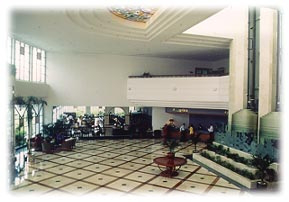

(Image size  = (300, 300, 3) ; Image = artstudio)


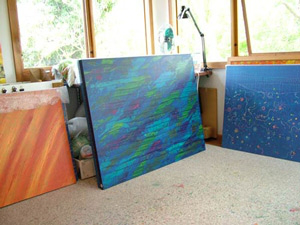

(Image size  = (640, 640, 3) ; Image = auditorium)


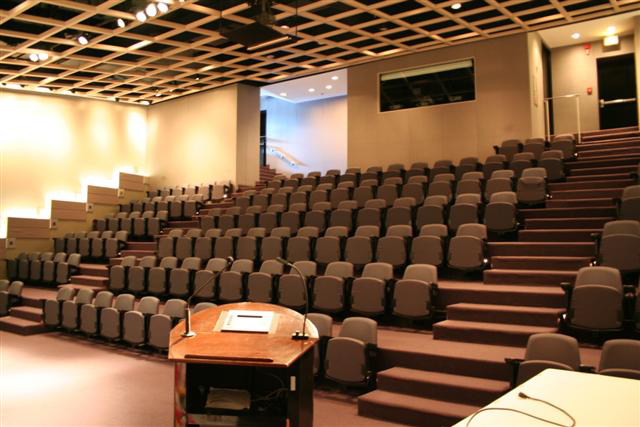

(Image size  = (500, 500, 3) ; Image = bakery)


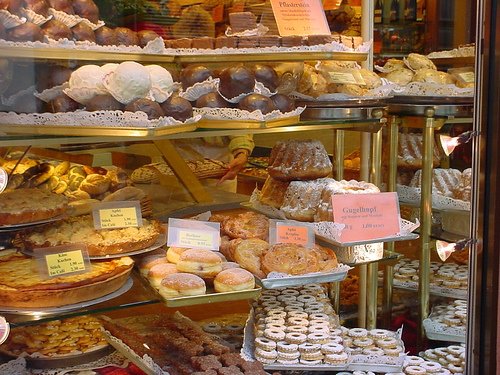

(Image size  = (320, 320, 3) ; Image = bar)


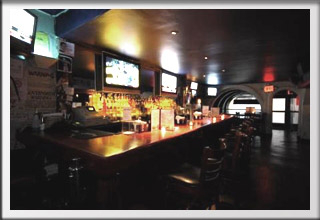

In [ ]:
# Fix the seed to reproduce the results
SEED = 1001
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # new flag present in tf 2.0+
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display # to display images
for i in range(0,5):
   
    image_file = list(img_dir.glob(Indoor_dir[i]+'/*'))
    img = PIL.Image.open(str(image_file[0]))
    
    print(f'(Image size  = ({img.size[0]}, {img.size[0]}, {len(img.mode)}) ; Image = {Indoor_dir[i]})')
    display(img)


**Load & Pre-Process Images**

In [ ]:
# RESIZE images to consistent size for TensorFlow to be able to FIT using
# tf.keras.preprocessing.image_dataset_from_directory (instead of looping)
# which has 14 Possible parameters that can be set.
help(tf.keras.preprocessing.image_dataset_from_directory)

Help on function image_dataset_from_directory in module keras.preprocessing.image_dataset:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)
    Generates a `tf.data.Dataset` from image files in a directory.
    
    If your directory structure is:
    
    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```
    
    Then calling `image_dataset_from_directory(main_directory, labels='inferred')`
    will return a `tf.data.Dataset` that yields batches of images from
    the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).
    
    Supported image forma

### **Question2. Build a baseline CNN model on the training dataset and evaluate it on the test dataset.**

#### The test loss =6.26 and test accuracy = 0.27. Based on the evaluation of the model there is no improvement in test accuracy after epoch 2 which shows the model is overfitting the data. If we change the epoch size, hidden layers and drop out rate it may improve the model performance.

**Setup parameters used to load and process the images which are currently stored as files in a directory.**

In [ ]:
# Set some parameters for tf.keras.preprocessing.image_dataset_from_directory
batch_size = 32
image_height = 256
image_width = 256
split = 0.2       # 0.2 values means 80% train and 20% test        # 0.9 for debug

**TRAIN DATA creation**

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  labels='inferred', # labels are generated from the directory structure
  label_mode='int', #'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
  validation_split= split,
  subset="training",
  seed= 1001, #fix the seed
  image_size=(image_height, image_width),
  batch_size=batch_size)


Found 14690 files belonging to 61 classes.
Using 11752 files for training.


**VALIDATION DATA creation**

In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  labels='inferred',
  label_mode='int',
  validation_split= split,
  subset="validation",
  seed=1001, # set seed
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 14690 files belonging to 61 classes.
Using 2938 files for validation.


**Visualize the Images**

In [ ]:
for img, lab in train_data.take(1):
    print(img[1].numpy().astype("uint16"))
    print(f'minimum = {np.amin(img[0].numpy().astype("uint16"))}, maximum = {np.amax(img[0].numpy().astype("uint16"))}')
    break

[[[182 187 180]
  [199 202 196]
  [158 158 156]
  ...
  [ 78  78  85]
  [ 78  78  85]
  [ 78  77  85]]

 [[188 193 186]
  [213 216 209]
  [188 189 184]
  ...
  [ 87  87  93]
  [ 85  85  93]
  [ 85  84  90]]

 [[215 218 213]
  [171 173 166]
  [177 178 169]
  ...
  [ 87  87  95]
  [ 85  84  92]
  [ 83  83  90]]

 ...

 [[ 93 117 127]
  [ 97 119 130]
  [ 98 119 130]
  ...
  [134 165 168]
  [132 166 168]
  [133 167 169]]

 [[ 97 121 131]
  [ 90 114 124]
  [ 88 110 121]
  ...
  [135 167 172]
  [139 170 173]
  [141 172 177]]

 [[ 92 117 122]
  [ 90 115 120]
  [ 88 112 117]
  ...
  [124 156 161]
  [125 158 161]
  [137 168 173]]]
minimum = 0, maximum = 255


**Let's display a set of the now uniform images.**

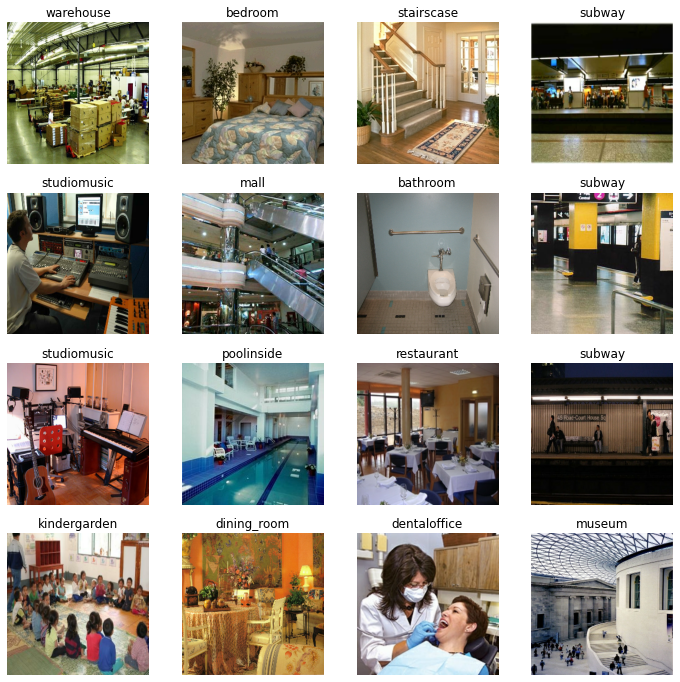

In [ ]:
# Plot one set of images in a space
# 4 images wide X 4 images tall

plt.figure(figsize=(12, 12))

for img, lab in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img[i].numpy().astype("uint16"))
    # Map the label index to name
    plt.title(Indoor_dir[lab[i]]) 
    plt.axis("off")

**Check the shape and size of the image data and the labels.**

In [ ]:
# Inspect the shapes of image batch and the labels batch
#type(train_data)
# the TF helps us creat the images and label in the dataset
for image_batch, labels_batch in train_data:
  print(f'image_batch.shape = {image_batch.shape} \nlabels_batch.shape = {labels_batch.shape } ')
  break

# image 4d (32batches, 256HEIGHT, 256WIDTH, 3CHANNELS ->COLORS- RGB)
# image_batch.shape = (32, 256, 256, 3) 
# labels_batch.shape = (32,) 

**The shape of one batch of the images is (32, 256, 256, 3) where:**

N =32 images per batch

Height = 256

Width = 256

Channel = 3 for RGB colors

**Configure the Dataset for Better performance**

In [ ]:
# Apply caching, shuffle, and prefetch 
# to help increase speed, reduce memory usage, and make processing more efficient

AUTOTUNE = tf.data.AUTOTUNE # Tune the value dynamically at runtime.

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

**Normalize the Data**

In [ ]:
# Typically the pixel values using 8 bits in the memoery, it denotes 2*2*..*2 =2^8 = 256 unique vlaues
# since Python starts from 0, 1, 2, ..., 255
#Normalize the pixel value to a number between 0 and 1 (instead of 0 and 255)
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)

Please build the CNN models based on the datasets. Then call the model fit funciton using something like

%%time callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 5) epochs= 100 history = model.fit( train_data, validation_data=val_data, epochs=epochs, callbacks=[callback], verbose = 1 )

**Create the CNN Model (TensorFlow)**

In [ ]:
num_labels = len(Indoor_dir)
print(f'There are {num_labels} classes in the image dataset')
image_channel = 3
print(f' There are {image_channel} channels in the images')
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, image_channel)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_labels)
])

There are 61 classes in the image dataset
 There are 3 channels in the images


**summarize the model architecture**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

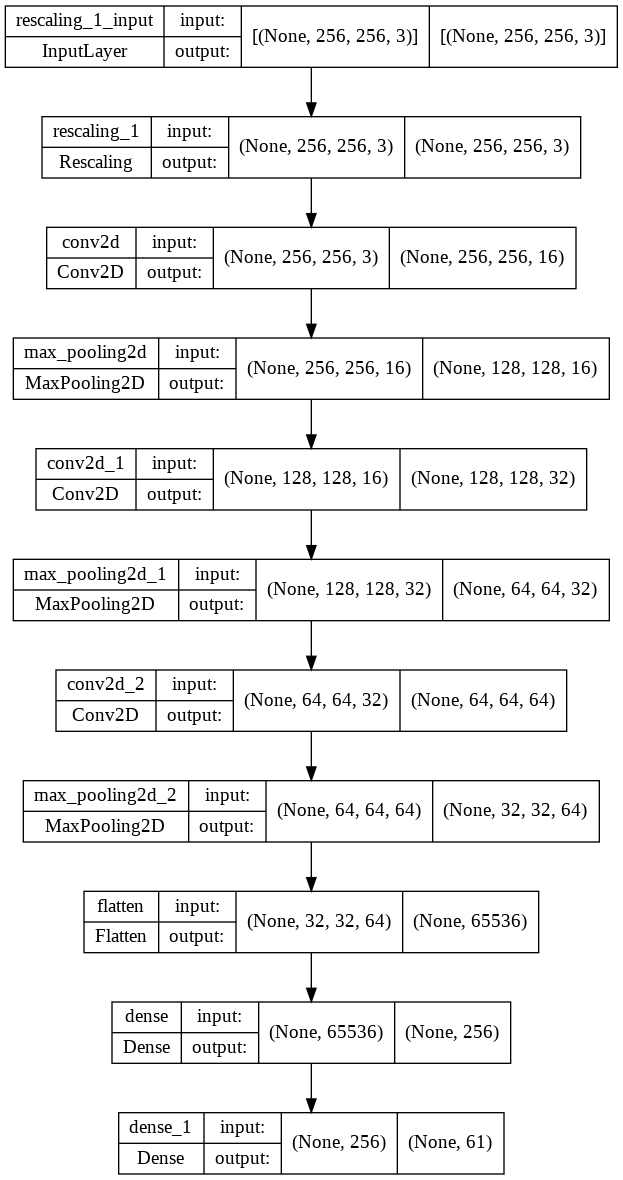

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Configure the Model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the CNN Model**

In [ ]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
epochs= 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback], verbose = 1
)

Epoch 1/20
368/368 [==============================] - 812s 465ms/step - loss: 3.6324 - accuracy: 0.1150 - val_loss: 3.3124 - val_accuracy: 0.1773
Epoch 2/20
368/368 [==============================] - 13s 35ms/step - loss: 2.7913 - accuracy: 0.2770 - val_loss: 3.0016 - val_accuracy: 0.2706
Epoch 3/20
368/368 [==============================] - 13s 36ms/step - loss: 1.4194 - accuracy: 0.6108 - val_loss: 3.4297 - val_accuracy: 0.2869
Epoch 4/20
368/368 [==============================] - 13s 35ms/step - loss: 0.2791 - accuracy: 0.9265 - val_loss: 4.8963 - val_accuracy: 0.2580
Epoch 5/20
368/368 [==============================] - 13s 35ms/step - loss: 0.0593 - accuracy: 0.9885 - val_loss: 5.4917 - val_accuracy: 0.2716
Epoch 6/20
368/368 [==============================] - 13s 35ms/step - loss: 0.0422 - accuracy: 0.9936 - val_loss: 6.2562 - val_accuracy: 0.2716
CPU times: user 2min 17s, sys: 14.5 s, total: 2min 32s
Wall time: 14min 44s


#### Evaluate the CNN Model

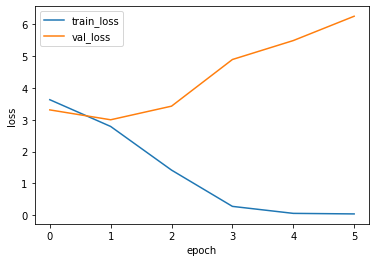

In [ ]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])


This above output shows a line graph of val_loss in the range 3.00 to 6.00 on the y axis and epoch in the range 0 to 5 on the x axis. Train_loss is in blue and val_loss is in orange. The blue line steadily decreases from 3.9 to 0. Based on the graph the validation loss is increasing from epoch 3 to 5 but the training loss is decreasing upto epoch 3 and then it decreases very slowly. So this shows an **overfitting**.



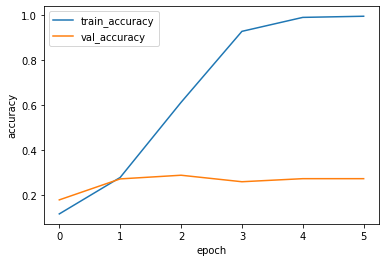

In [ ]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])


This above output shows a line graph of val_accuracy in the range 0.2 to 0.3 on the y axis and epoch in the range 0 to 5 on the x axis. Train_accuracy is in blue and val_accuracy is in orange. The blue line steadily increases from near 0 to 3 epochs. The orange line increases slightly between 0.1 and 0.3 and then flattens out. There is no improvement in validation accuracy after epoch 2 so it shows the model is overfitting the data.



Compute the loss and accuracy for the test dataset as follows:

In [ ]:
test_loss, test_acc = model.evaluate(val_data)
print(f' The test loss ={test_loss:.2f} and test accuracy = {test_acc:.2f}')

92/92 [==============================] - 1s 13ms/step - loss: 6.2562 - accuracy: 0.2716
 The test loss =6.26 and test accuracy = 0.27


### **Question3. Build a second CNN model with data augmentation and dropout and evaluate it on the test dataset.**

#### The test accuracy = 0.21 and The test loss = 3.17. Based on the evaluation graphs the model is overfitting the data. Data augmentation did not help to improve the accuracy but if we change the epoch size, hidden layers and drop out rate it may improve the model performance.

Neural Networks work better on a large dataset. We can generate more input images by data augmentation. We can augment images using transformations of images as follows:

In [ ]:
data_aug = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(image_height, 
                                                              image_width,
                                                              image_channel)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1,width_factor = 0.1 ),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.1, 0.1))
  ]
)

We can apply the data augmentation to an image and obtain many new images.

 

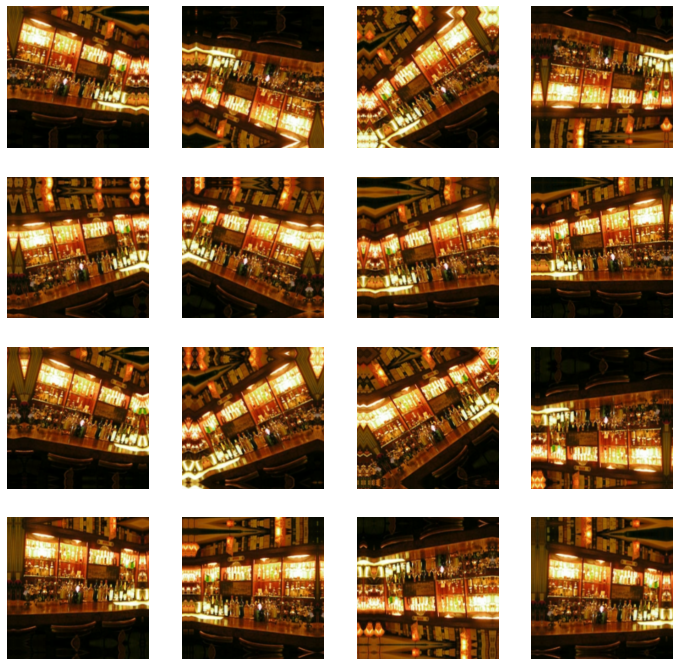

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for img, lab in train_data.take(1):
  for i in range(16):
    aug_images = data_aug(img)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(aug_images[0].numpy().astype("uint16"))
    plt.axis("off")

We build another model by adding the data augmentation and data normalization:

In [ ]:
model = tf.keras.Sequential([
  # Data augmentation
  data_aug,
  # Data normalization
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_labels)
])


The label has 61 classes. It is encoded as an integer. Therefore, the loss function should be tf.keras.losses.SparseCategoricalCrossentropy.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# summarize the model architecture:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

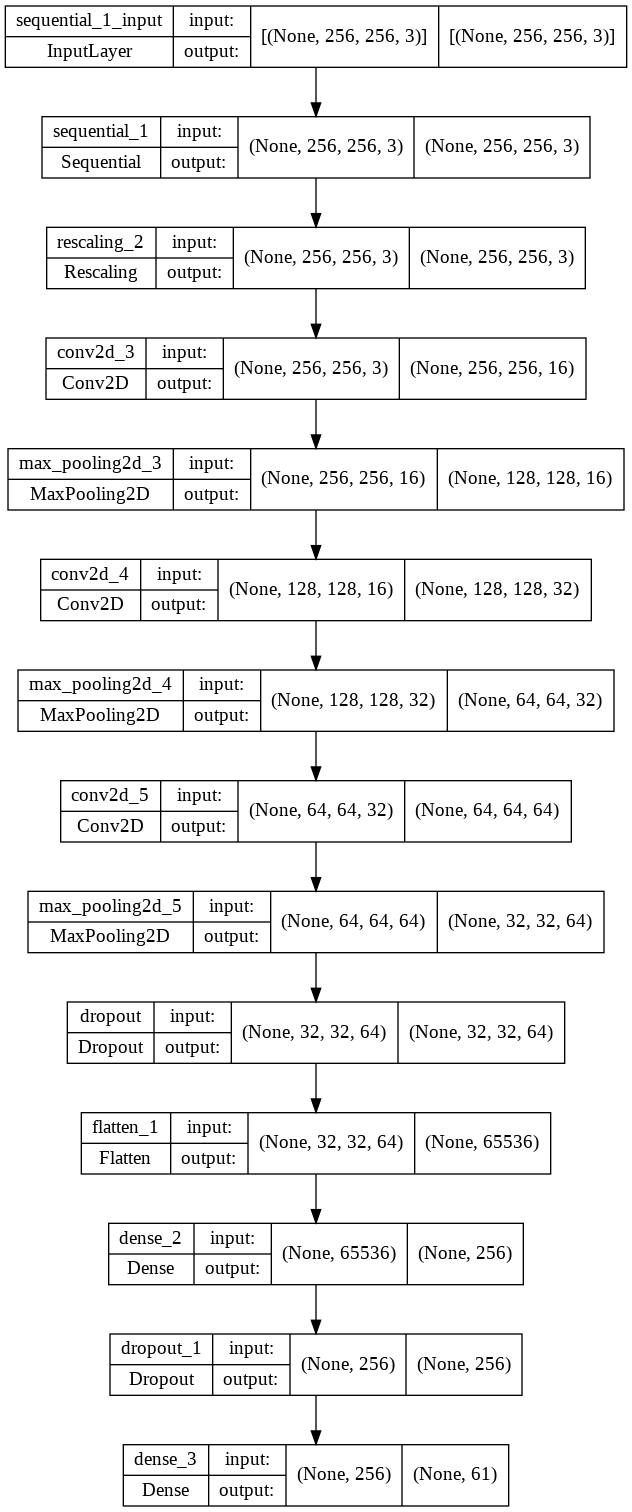

In [ ]:
# plotting the input shape and output shape for each layer:
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
# train the model using early stopping:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
epochs= 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback], verbose = 1
)

Epoch 1/20
368/368 [==============================] - 17s 42ms/step - loss: 3.8414 - accuracy: 0.0785 - val_loss: 3.6189 - val_accuracy: 0.1150
Epoch 2/20
368/368 [==============================] - 15s 42ms/step - loss: 3.5692 - accuracy: 0.1130 - val_loss: 3.5899 - val_accuracy: 0.1307
Epoch 3/20
368/368 [==============================] - 15s 42ms/step - loss: 3.4170 - accuracy: 0.1362 - val_loss: 3.4782 - val_accuracy: 0.1327
Epoch 4/20
368/368 [==============================] - 16s 42ms/step - loss: 3.3165 - accuracy: 0.1476 - val_loss: 3.2504 - val_accuracy: 0.1709
Epoch 5/20
368/368 [==============================] - 16s 42ms/step - loss: 3.2320 - accuracy: 0.1644 - val_loss: 3.1581 - val_accuracy: 0.1889
Epoch 6/20
368/368 [==============================] - 15s 42ms/step - loss: 3.1535 - accuracy: 0.1837 - val_loss: 3.2940 - val_accuracy: 0.1818
Epoch 7/20
368/368 [==============================] - 15s 42ms/step - loss: 3.0948 - accuracy: 0.1995 - val_loss: 2.9847 - val_accuracy:

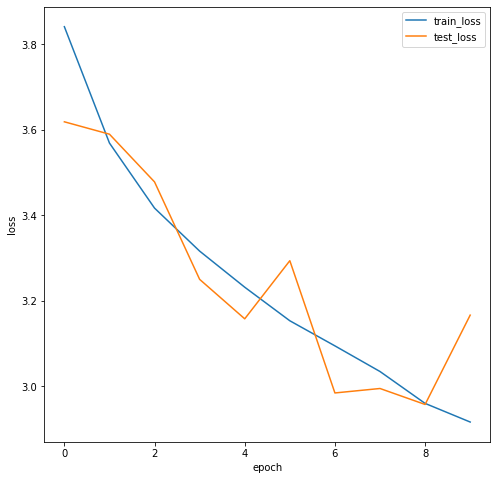

In [ ]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#Add legends
plt.legend(labels=['train_loss', 'test_loss'])


Based on this graph of loss vs epoch, the test loss is a jagged line which decreases from 3.6 to 3 and then increases after epoch 8. There is a steady decrease in training loss from 3.8 to 2. This indicates that the model is **overfitting** the data.

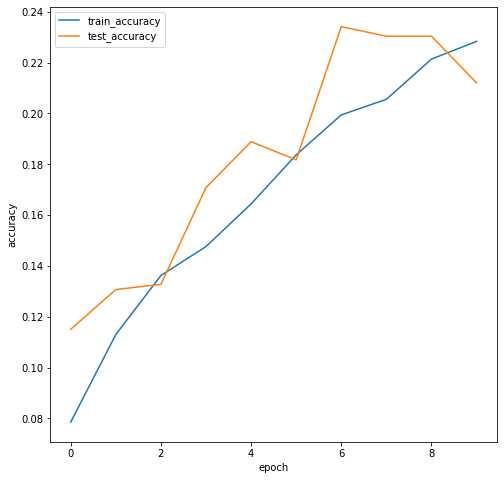

In [ ]:
plt.figure(figsize=(8, 8))
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'test_accuracy'])


Based on the graph the test_accuracy is a jagged line which increases from .11 to .23 and then decreases to .21. There is a steady increase in training accuracy from epoch 0 to epoch 8. This indicates towards **overfitting**.

This above output shows a line graph of train_accuracy in the range 0.32 to 0.34 on the y axis and epoch in the range 0 to 3 on the x axis. Train_accuracy is in blue and Test_accuracy is in orange. The blue line steadily increases from near 0.32 to over 0.34. The orange line is flat and at 0.3359.It is overfitting the data



In [ ]:
loss, acc = model.evaluate(val_data)
print(f"The test accuracy = {acc:.2f} and The test loss = {loss:.2f}")

92/92 [==============================] - 1s 13ms/step - loss: 3.1667 - accuracy: 0.2120
The test accuracy = 0.21 and The test loss = 3.17


### **Question4. Build a third CNN model based on the pre-trained model(transfer learning) and evaluate it on the test dataset.**

#### Test_loss: 2.7018 - Test_accuracy: 0.2961 for this model. This is the highest accuracy among all other models. BAsed on the evaluation graphs the model is underfitting and there are chances of improvement with the change in number of epochs and other hyper parameters tuning.

To build a CNN network using transfer learning by choosing a pretrained model we need to remove the last layer/top (fully-connected layer) of the neural network and add the classifier in the end. I am using pre-trained model: tf.keras.applications.MobileNetV3Large



Let's look at the model architecture. It is a very deep network.

In [ ]:
# Specify the image size for our dataset
IMG_SHAPE = (image_height, image_width, image_channel)

EfficientNetV2M_model = tf.keras.applications.efficientnet_v2.EfficientNetV2M(input_shape = IMG_SHAPE,
                                               include_top=False, # Remove the fully-connected layer
                                               weights='imagenet') # Pre-training on ImageNet


It is a very deep network. We don't want to retrain the convolutional base. Therefore we need to freeze it and avoid these weights in these layers being updated.

In [ ]:
EfficientNetV2M_model.trainable = False

We should be consistent with the preprocessing in the EfficientNetV2M. Let's import this function from the built-in model.

In [ ]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

Let's take out a batch of data and check the size of the feature matrix.

In [ ]:
image_batch, label_batch = next(iter(train_data))
feature_batch = EfficientNetV2M_model(image_batch)
print(feature_batch.shape)

(32, 8, 8, 1280)


It is a 4D matrix. We need to convert it to a 2D matrix. Then we can add the classification layer and perform classification.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
global_average_layer = tf.keras.layers.Flatten()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 81920)


Add the Top Layer (Classifier)

In [ ]:
prediction_layer = tf.keras.layers.Dense(61)
prediction_batch = prediction_layer(feature_batch_average)
print(f' The size of the predicted value for a given batch = {prediction_batch.shape}')

 The size of the predicted value for a given batch = (32, 61)


Create model using Transfer Learning

We create the model using functional API instead of sequential API. We need to define the inputs separately. We make a model object by specifying the initial inputs and final outputs of the neuron network. It is more flexible than sequential API.

Configure the Model

The label has 61 classes. It is encoded as an integer. Therefore, the loss function should be tf.keras.losses.SparseCategoricalCrossentropy.

In [ ]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

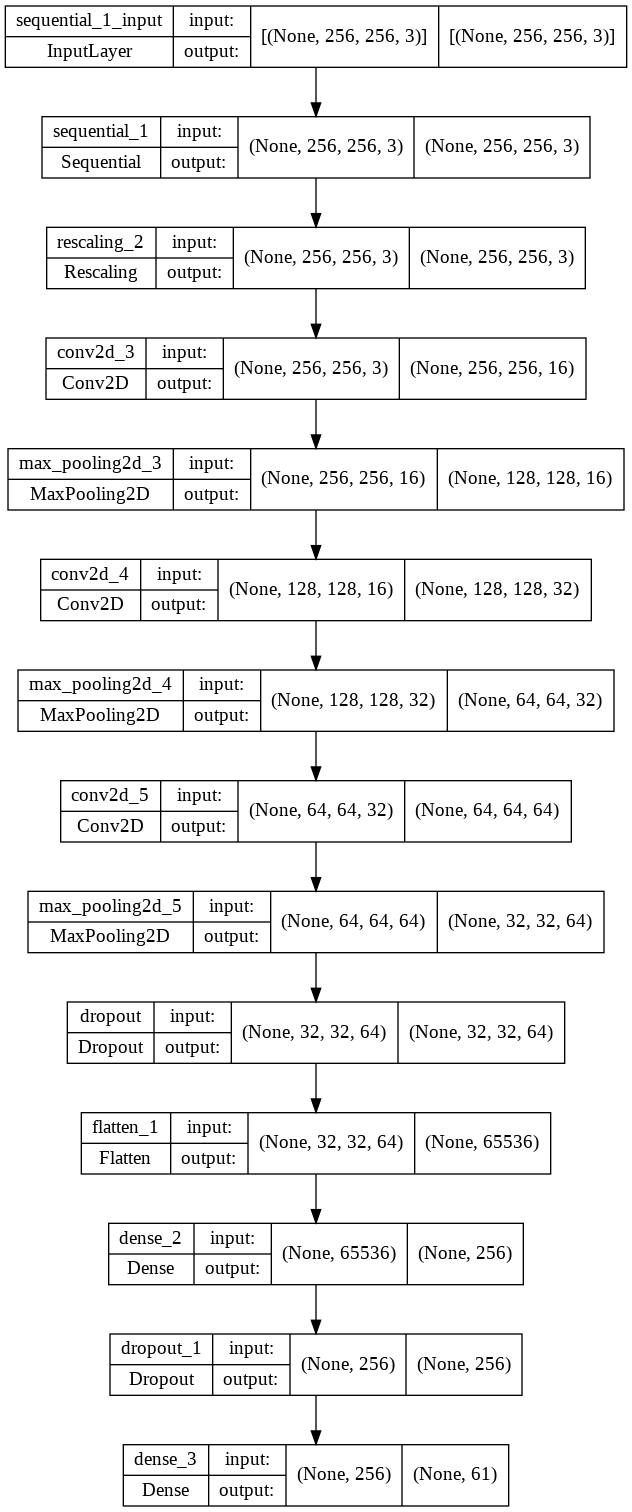

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Train the Image Classification Model 

In [ ]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)
epochs= 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback], verbose = 1
)

Epoch 1/20
368/368 [==============================] - 17s 42ms/step - loss: 2.7041 - accuracy: 0.2732 - val_loss: 2.7543 - val_accuracy: 0.2869
Epoch 2/20
368/368 [==============================] - 15s 42ms/step - loss: 2.7002 - accuracy: 0.2762 - val_loss: 2.7552 - val_accuracy: 0.2811
Epoch 3/20
368/368 [==============================] - 16s 42ms/step - loss: 2.6853 - accuracy: 0.2785 - val_loss: 2.7841 - val_accuracy: 0.2737
Epoch 4/20
368/368 [==============================] - 15s 42ms/step - loss: 2.6834 - accuracy: 0.2783 - val_loss: 2.7155 - val_accuracy: 0.2883
Epoch 5/20
368/368 [==============================] - 15s 42ms/step - loss: 2.6585 - accuracy: 0.2808 - val_loss: 2.7431 - val_accuracy: 0.2862
Epoch 6/20
368/368 [==============================] - 15s 42ms/step - loss: 2.6634 - accuracy: 0.2859 - val_loss: 2.7218 - val_accuracy: 0.2849
Epoch 7/20
368/368 [==============================] - 15s 42ms/step - loss: 2.6640 - accuracy: 0.2861 - val_loss: 2.7378 - val_accuracy:

We evaluate our model by checking the in-sample fit and out of sample fit.

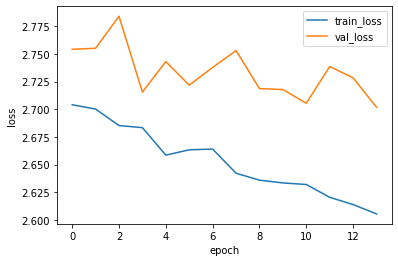

In [ ]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
#Add legends
plt.legend(labels=['train_loss', 'val_loss'])

Based on above graph the val_loss is a jagged line which is decreasing from 2.77 to 2.72 from epoch 0 to 12. Training loss is steadily decreasing from 2.70 to 2.60. This model shows that the model is underfitting and there are chances of improvement by changing the epoch size and other parameters.

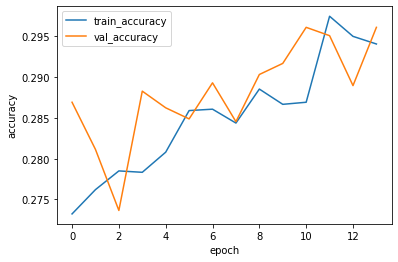

In [ ]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
#Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

Based on the above graph both train_accuracy and val_accuracy are jagged line with an increase in accuracy from epoch 0 to 12. The line graph shows underfitting and there are chances of improvent with the change in epochs and other parameters.

### **Question5. Which model do you recommend for the model in Q2, Q3, and Q4? Justify your answer.**

### **Answer:** For the CNN baseline model (Q2) the test loss =6.26 and test accuracy = 0.27. The CNN model with data augmentation (Q3) the test accuracy = 0.21 and the test loss = 3.17 and for the CNN model with transfer learning (Q4) the test_loss is 2.7 and the test_accuracy is 0.30.The accuracy of all these models can be improved by hyperparameter tuning.

**Based on the evalution of the models Transfer Learning model in Q4 is the best model as it has the highest accuracy and the model is underfitting and there are chances of improvement. So I would recommend model Q4.**

## **PART II**

### **Question1. Download the dataset that is about 81 MB from Kaggle into the local disk and unzip it.**

In [ ]:
from zipfile import ZipFile
from urllib.request import urlretrieve
import pandas as pd
import zipfile
from pathlib import Path


In [ ]:
# unzip the file and then load the dataset:
zf = zipfile.ZipFile('/content/drive/MyDrive/final_project/partII/archivePartII.zip') 
# if you want to see all files inside zip folder
zf.namelist() 
# now read your csv file 
df = pd.read_csv(zf.open('training.1600000.processed.noemoticon.csv'), encoding = "ISO-8859-1",sep = ',', names=["sentiment", "ids", "date", "flag", "user", "text"])


In [ ]:
df.head(1941)

sentiment         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1936          0  1468266415  Tue Apr 07 00:38:17 PDT 2009  NO_QUERY   
1937          0  1468266948  Tue Apr 07 00:38:30 PDT 2009  NO_QUERY   
1938          0  1468267024  Tue Apr 07 00:38:29 PDT 2009  NO_QUERY   
1939          0  1468267411  Tue Apr 07 00:38:37 PDT 2009  NO_QUERY   
1940          0  1468267465  Tue Apr 07 00:38:38 PDT 2009  NO_QUERY   

                 user                                               text  
0     _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1       scotthamilton  is upset that he can't update his Facebook by ...  
2            mattycus  @Kenichan I dived many times for the ball. Man...  
3             ElleCTF    my whole body feels itchy and like its on fire   
4              Karoli  @nationwideclass no, it's not behaving at all....  
...               ...                                                ...  
1936       lainers895  @awillert  im so jealous..i want salsa, but th...  
1937    thepetshopboy  blip is &quot;under maintenance&quot; &amp; i'...  
1938      HezzyRchild         @MadNinjaCurl hey neighbor, neither can I   
1939         saragwin  @msJodiOdie its such a sad situation. Though 1...  
1940        ei8htyOne   and so the editing of 3000 wedding shots begins   

[1941 rows x 6 columns]

### **Question2. Clean and preprocess the text data and split into training and test dataset.**

In [ ]:
# import the libraries:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# remove NaN values as follows:
df.fillna('', inplace=True)

In [ ]:
# Dropping the columns ids, date, flag, user and removing duplicate tweets
df = df.drop(['ids', 'date', 'flag', 'user'], axis = 'columns')
df = df.drop_duplicates(keep = 'first')
print("The size of dataset after removing duplicates is : ", len(df))

The size of dataset after removing duplicates is :  1583691


In [ ]:
# Replacing the values to represent 1 as positive and 0 as negative
df['sentiment'] = df['sentiment'].replace(4,1)

Negative Sentiment Tweets Percentage is 49.9%
Positive Sentiment Tweets Percentage is 50.1%


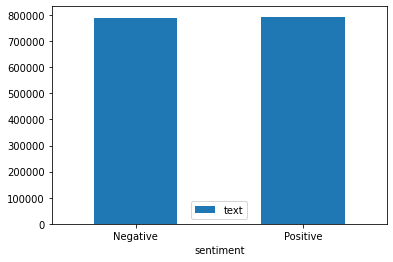

In [ ]:
#Plotting the dataset 
pltbar = df.groupby('sentiment').count().plot(kind='bar')
pltbar.set_xticklabels(['Negative','Positive'], rotation=0)


#Calculating percentages of negative and positive tweets
positiveTweets = 100*len(df.loc[df['sentiment']==1,'sentiment'])/len(df['sentiment'])
negativeTweets = 100*len(df.loc[df['sentiment']==0,'sentiment'])/len(df['sentiment'])
print(f'Negative Sentiment Tweets Percentage is {round(negativeTweets,2)}%')
print(f'Positive Sentiment Tweets Percentage is {round(positiveTweets,2)}%')

# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

In [ ]:
df1 = df.reset_index(inplace = False)
# check if there are empty rows:
empty_string = []
nonempty_string = []
x = len(df1['text'])
for i in range(x):
   if len(df1['text'][i]) == 0:
     empty_string.append('String is empty')

   if len(df1['text'][i]) != 0:
      nonempty_string.append('String is not empty')
print(f'number of empty rows in the new column "Review": {len(empty_string)}')
print(f'number of non empty rows in the new column "Review": {len(nonempty_string)}')

number of empty rows in the new column "Review": 0
number of non empty rows in the new column "Review": 1583691


In [ ]:
# number of categories in the label 'Recommended IND' and their distribution:
print('The distribution of categories in the label is balanced.')
df['sentiment'].value_counts()

The distribution of categories in the label is balanced.


1    793506
0    790185
Name: sentiment, dtype: int64

In [ ]:
stop_words = stopwords.words('english')
def cleanTweet(text):
    cleanedTweets = []
    
    for tweets in text:
        #Converting text to lowercase
        tweets = tweets.lower()

        #Removing newline breaks
        tweets = re.sub(r'\n', '', tweets)
        
        #Removing URLs
        tweets = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweets)
        
        #Removing @usernames
        tweets = re.sub('@[^\s]+','', tweets)
        
        #Removing punctuations, numbers & special characters
        tweets = re.sub("[^a-zA-Z]", " ", tweets)
        
        #Removing emojis
        tweets = re.compile("["
                   u"U0001F600-U0001F64F"  # emoticons
                   u"U0001F300-U0001F5FF"  # symbols & pictographs
                   u"U0001F680-U0001F6FF"  # transport & map symbols
                   u"U0001F1E0-U0001F1FF"  # flags (iOS)
                   u"U00002702-U000027B0"
                   u"U000024C2-U0001F251"
                               "]+", flags=re.UNICODE).sub(r'', tweets)
        
        finaltweet = ''
        #Removing short words(with length less than 3) & stop words
        temp = tweets.split()
        stop_words = stopwords.words('english')
        stop_words = stop_words + ['hi', 'im', 'amp', 'quot']
        textwithoutstopwords = [word for word in temp if not word in stop_words and len(word)>2]
        
        #Lemmatization
        lem = WordNetLemmatizer()
        lemmatizedText = [lem.lemmatize(y) for y in textwithoutstopwords]
        finaltweet = ' '.join(lemmatizedText)
        cleanedTweets.append(finaltweet)
    return cleanedTweets

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
#Data after preprocessing
cleanedTweets = cleanTweet(text)
df['Cleaned Tweets'] = cleanedTweets
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


sentiment                                               text  \
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1                0  is upset that he can't update his Facebook by ...   
2                0  @Kenichan I dived many times for the ball. Man...   
3                0    my whole body feels itchy and like its on fire    
4                0  @nationwideclass no, it's not behaving at all....   
...            ...                                                ...   
1599995          1  Just woke up. Having no school is the best fee...   
1599996          1  TheWDB.com - Very cool to hear old Walt interv...   
1599997          1  Are you ready for your MoJo Makeover? Ask me f...   
1599998          1  Happy 38th Birthday to my boo of alll time!!! ...   
1599999          1  happy #charitytuesday @theNSPCC @SparksCharity...   

                                            Cleaned Tweets  
0                  bummer shoulda got david carr third day  
1        upset update facebook texting might cry result...  
2             dived many time ball managed save rest bound  
3                          whole body feel itchy like fire  
4                                         behaving mad see  
...                                                    ...  
1599995                      woke school best feeling ever  
1599996            thewdb com cool hear old walt interview  
1599997                     ready mojo makeover ask detail  
1599998    happy birthday boo alll time tupac amaru shakur  
1599999                               happy charitytuesday  

[1583691 rows x 3 columns]

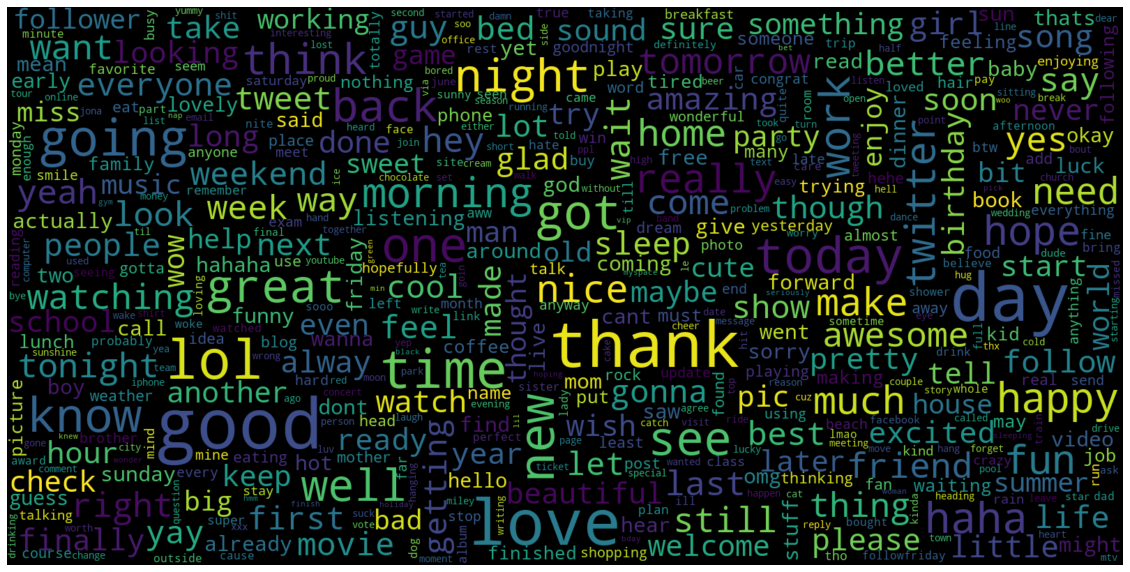

In [ ]:
#Visualization of positive sentiment frequent words using word clouds
all_words = " ".join([tweet for tweet in df['Cleaned Tweets'][df['sentiment']==1]])

wordcloud = WordCloud(max_words = 500, width=1600, height=800, collocations = False, max_font_size=100).generate(all_words)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

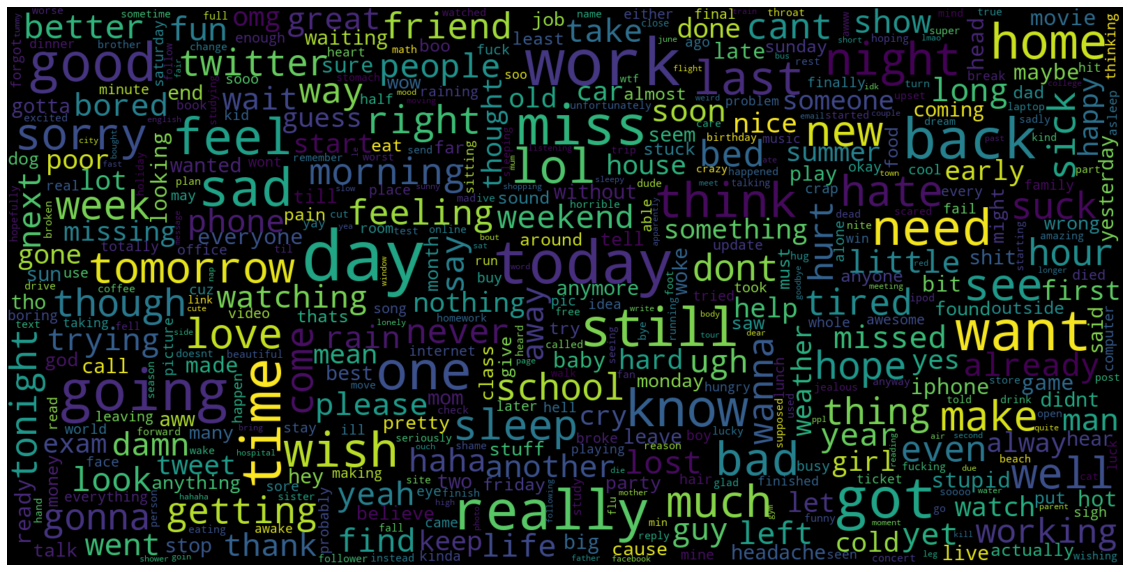

In [ ]:
#Visualization of negative sentiment frequent words using word clouds
all_words = " ".join([tweet for tweet in df['Cleaned Tweets'][df['sentiment']==0]])

wordcloud = WordCloud(max_words = 500, width=1600, height=800, collocations = False, max_font_size=100).generate(all_words)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**I have used only 50% of the dataset to reduce the time of running the models:**

In [ ]:
# Split the dataset into train and test with 80% train and 20% test as follows:
X = df['Cleaned Tweets'].values
y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.5)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.2)
print("Size of training set : ", len(X_train))
print("Size of test set : ", len(X_test))

Size of training set :  633476
Size of test set :  158369


In [ ]:
# print the number of rows in train and test set as follows:
print(f'X_train size  ={X_train.shape}; X_test size  ={X_test.shape}')

X_train size  =(633476,); X_test size  =(158369,)


### **Question3. Build a baseline RNN model using embedding layer and GRU on the training dataset and evaluate it on the test dataset.**

#### For this model test_loss is 0.4997 and test_accuracy is 0.7318. The evaluation graphs shows that the model is overfitting the data and the model performance can be improved by hyperparameter tuning.

Now, we need to convert the text to numerical values using TextVectorization. It transforms a batch of strings into a list of token indices.

In [ ]:
# Specify the vocab size
VOCAB_SIZE = 1000
# Perform textvectorization
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)

# Fits the state of the preprocessing layer to the dataset.
encoder.adapt(X_train)

In [ ]:
# first 20 words of the list are as follows:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'day', 'good', 'get', 'like', 'today', 'love', 'work',
       'time', 'going', 'got', 'lol', 'one', 'back', 'know', 'really',
       'want', 'see', 'night'], dtype='<U14')

In [ ]:
# create the model:
model = tf.keras.Sequential([
    # first layer: Convert review text to indices
    encoder, 
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    # Second layer is GRU layer:
    tf.keras.layers.GRU(128, return_sequences=True),
    # The third layer is the LSTM to capture the "context" of the words/tokens:
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # Last two layers are Binary classifier:
    tf.keras.layers.SimpleRNN(64, activation='relu'),
    tf.keras.layers.Dense(1)])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 128)         74496     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 150,913
Trainable params: 150,913
Non-trainable params: 0
__________________________________________________

In [ ]:
# configure the model:
# We use the binary cross-entropy with logits = True since the activation function in the last layer is 
# identity (Not sigmoid). We also specify the optimizer and metrics.
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# train the RNN model:
%%time
history = model.fit(x=X_train,y=Y_train,batch_size= 32,epochs=5,
          validation_data=(X_test,Y_test), verbose= 1
          )

Epoch 1/5
19797/19797 [==============================] - 627s 32ms/step - loss: 0.4838 - accuracy: 0.7404 - val_loss: 0.4988 - val_accuracy: 0.7319
Epoch 2/5
19797/19797 [==============================] - 626s 32ms/step - loss: 0.4823 - accuracy: 0.7414 - val_loss: 0.5012 - val_accuracy: 0.7224
Epoch 3/5
19797/19797 [==============================] - 621s 31ms/step - loss: 0.4807 - accuracy: 0.7425 - val_loss: 0.4992 - val_accuracy: 0.7318
Epoch 4/5
19797/19797 [==============================] - 629s 32ms/step - loss: 0.4790 - accuracy: 0.7435 - val_loss: 0.4988 - val_accuracy: 0.7325
Epoch 5/5
19797/19797 [==============================] - 625s 32ms/step - loss: 0.4773 - accuracy: 0.7445 - val_loss: 0.4997 - val_accuracy: 0.7318
CPU times: user 2h 5min 34s, sys: 16min 16s, total: 2h 21min 50s
Wall time: 52min 8s


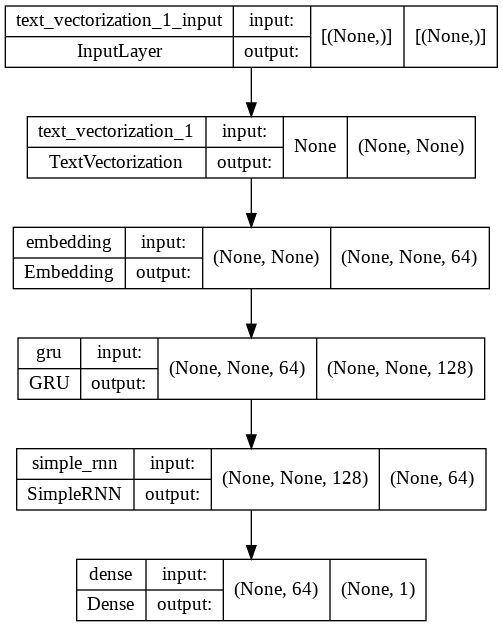

In [ ]:
# Look at the model architecture:
tf.keras.utils.plot_model(model, show_shapes=True)

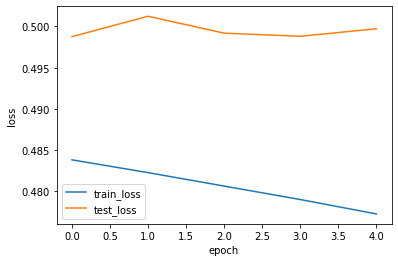

In [ ]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', 'test_loss'])

Based on the above graph there is a slight increase in test loss and a steady decrease in train loss from epoch 0 to 4. this shows **overfitting** the data. 

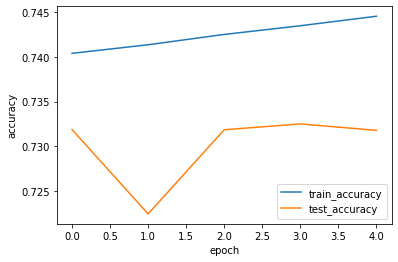

In [ ]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', 'test_accuracy'])

Based on the above graph there is a steady increase in training accuracy and the test accuracy almost flattens after epoch 2. This shows an **overfitting**.

In [ ]:
# the cutoff probability is 50%
y_pred = (model.predict(X_test)> 0.5).astype(int)

In [ ]:
# confusion matrix for the actual and predicted values:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[67616, 11402],
       [31075, 48276]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'TrueNegative: {tn} \nFalsePositive: {fp} \nFalseNegative: {fn} \nTruePositive: {tp}')

TrueNegative: 67616 
FalsePositive: 11402 
FalseNegative: 31075 
TruePositive: 48276


In [ ]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(Y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.69      0.86      0.76     79018
    positive       0.81      0.61      0.69     79351

    accuracy                           0.73    158369
   macro avg       0.75      0.73      0.73    158369
weighted avg       0.75      0.73      0.73    158369



### **Question4. Build a second RNN model using embedding layer and LSTM and evaluate it on the test dataset.**

#### For this model val_loss is 0.5011 and val_accuracy is 0.7300. Based on the evaluation graphs the model is overfitting the data and hyperparameter tuning can help to improve the model performance.

Now, we need to convert the text to numerical values using TextVectorization. It transforms a batch of strings into a list of token indices.

In [ ]:
# create the model:
model = tf.keras.Sequential([
    # first layer: Convert review text to indices
    encoder, 
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    # Second layer is GRU layer:
    #tf.keras.layers.GRU(128, return_sequences=True),
    # The third layer is the LSTM to capture the "context" of the words/tokens:
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # Last two layers are Binary classifier:
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)])

In [ ]:
# configure the model:
# We use the binary cross-entropy with logits = True since the activation function in the last layer is 
# identity (Not sigmoid). We also specify the optimizer and metrics.
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# train the RNN model:
%%time
history = model.fit(x=X_train,y=Y_train,batch_size= 32,epochs=5,
          validation_data=(X_test,Y_test), verbose= 1
          )

Epoch 1/5
19797/19797 [==============================] - 415s 21ms/step - loss: 0.5220 - accuracy: 0.7115 - val_loss: 0.5112 - val_accuracy: 0.7229
Epoch 2/5
19797/19797 [==============================] - 405s 20ms/step - loss: 0.5060 - accuracy: 0.7251 - val_loss: 0.5086 - val_accuracy: 0.7143
Epoch 3/5
19797/19797 [==============================] - 403s 20ms/step - loss: 0.5009 - accuracy: 0.7281 - val_loss: 0.5032 - val_accuracy: 0.7289
Epoch 4/5
19797/19797 [==============================] - 395s 20ms/step - loss: 0.4979 - accuracy: 0.7303 - val_loss: 0.5021 - val_accuracy: 0.7310
Epoch 5/5
19797/19797 [==============================] - 399s 20ms/step - loss: 0.4952 - accuracy: 0.7324 - val_loss: 0.5011 - val_accuracy: 0.7300
CPU times: user 1h 28min 26s, sys: 12min 2s, total: 1h 40min 28s
Wall time: 33min 36s


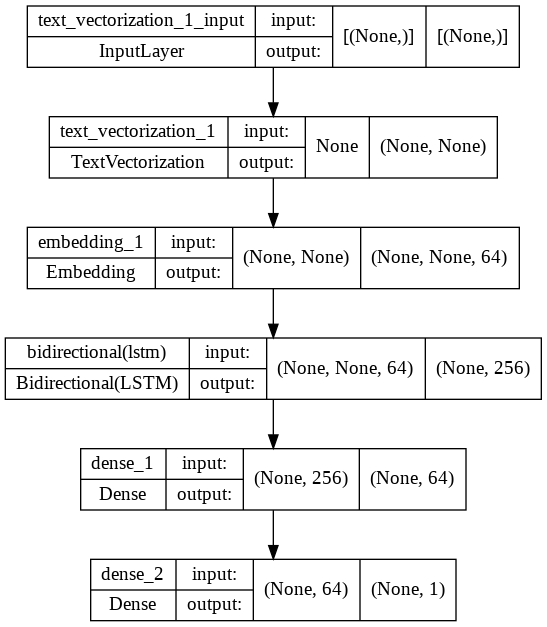

In [ ]:
# Look at the model architecture:
tf.keras.utils.plot_model(model, show_shapes=True)

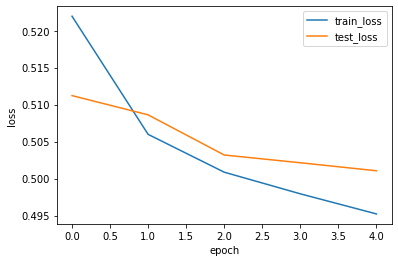

In [ ]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', 'test_loss'])

Based on the above graph there is a steady decrease in  training loss and but the test loss almost flattens from epoch 2 to 4. This shows an overfitting and there are chances of improvement with change in epoch size and other hyperparameters.

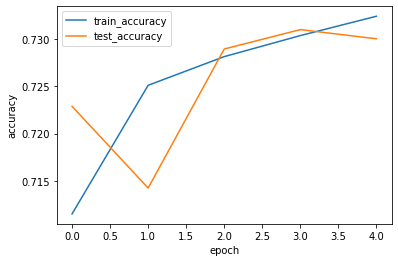

In [ ]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', 'test_accuracy'])

Based on the above graph the training accuracy is increasing from epoch 0 to 4 and test accuracy starts decreasing from epoch 3. This shows an overfitting.

In [ ]:
# the cutoff probability is 50%
y_pred = (model.predict(X_test)> 0.5).astype(int)

In [ ]:
# confusion matrix for the actual and predicted values:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[67443, 11575],
       [31185, 48166]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'TrueNegative: {tn} \nFalsePositive: {fp} \nFalseNegative: {fn} \nTruePositive: {tp}')

TrueNegative: 67443 
FalsePositive: 11575 
FalseNegative: 31185 
TruePositive: 48166


In [ ]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(Y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.68      0.85      0.76     79018
    positive       0.81      0.61      0.69     79351

    accuracy                           0.73    158369
   macro avg       0.75      0.73      0.73    158369
weighted avg       0.75      0.73      0.73    158369



### **Question5. Build a third RNN model using embedding layer and GRU and LSTM and evaluate it on the test dataset.**



#### For this model the test_loss is 0.4986 and test_accuracy is 0.7341. The evaluation graph shows underfitting. The model performance can be improved by change in epoch size and hyperparameter tuning.

Now, we need to convert the text to numerical values using TextVectorization. It transforms a batch of strings into a list of token indices.

In [ ]:
# create the model:
model = tf.keras.Sequential([
    # first layer: Convert review text to indices
    encoder, 
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    # Second layer is GRU layer:
    tf.keras.layers.GRU(128, return_sequences=True),
    # The third layer is the LSTM to capture the "context" of the words/tokens:
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # Last two layers are Binary classifier:
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)])

In [ ]:
# configure the model:
# We use the binary cross-entropy with logits = True since the activation function in the last layer is 
# identity (Not sigmoid). We also specify the optimizer and metrics.
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# train the RNN model:
%%time
history = model.fit(x=X_train,y=Y_train,batch_size= 32,epochs=5,
          validation_data=(X_test,Y_test), verbose= 1
          )

Epoch 1/5
19797/19797 [==============================] - 584s 29ms/step - loss: 0.4922 - accuracy: 0.7346 - val_loss: 0.5001 - val_accuracy: 0.7327
Epoch 2/5
19797/19797 [==============================] - 576s 29ms/step - loss: 0.4901 - accuracy: 0.7359 - val_loss: 0.5007 - val_accuracy: 0.7230
Epoch 3/5
19797/19797 [==============================] - 582s 29ms/step - loss: 0.4881 - accuracy: 0.7373 - val_loss: 0.4981 - val_accuracy: 0.7325
Epoch 4/5
19797/19797 [==============================] - 584s 29ms/step - loss: 0.4862 - accuracy: 0.7389 - val_loss: 0.4975 - val_accuracy: 0.7334
Epoch 5/5
19797/19797 [==============================] - 581s 29ms/step - loss: 0.4845 - accuracy: 0.7402 - val_loss: 0.4986 - val_accuracy: 0.7341
CPU times: user 2h 1min 43s, sys: 17min 51s, total: 2h 19min 34s
Wall time: 48min 26s


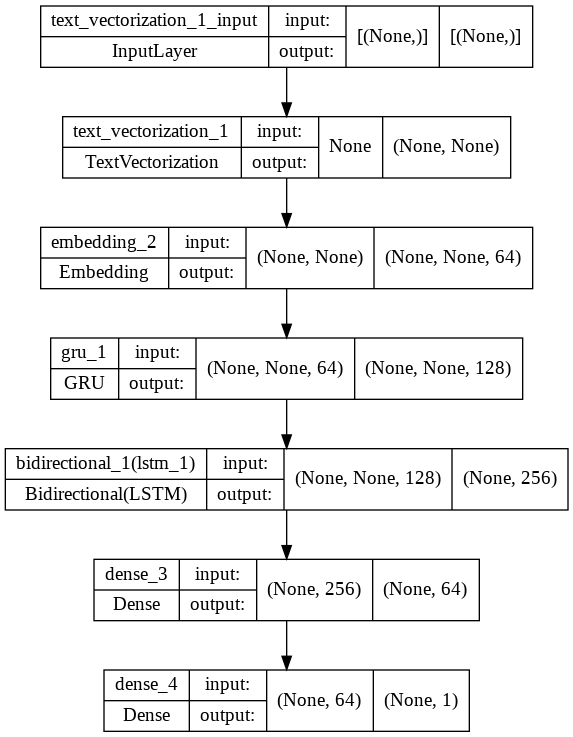

In [ ]:
# Look at the model architecture:
tf.keras.utils.plot_model(model, show_shapes=True)

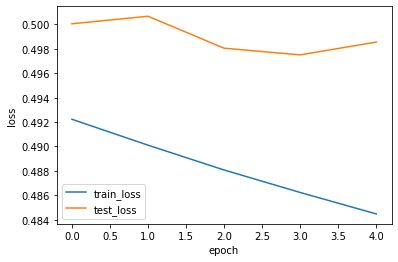

In [ ]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', 'test_loss'])

Based on this graph there is a steady decrease in training loss from epoch 0 to 4 but the test loss first decreases from epoch 1 to 3 and then increases slowly.This shows an overfitting.

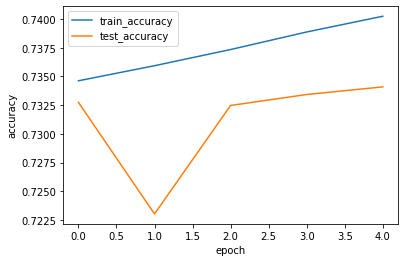

In [ ]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', 'test_accuracy'])

Based on the above graph there is a steady increase in training accuracy from epoch 0 to 4. Test accuracy first decreases and then increases from epoch 1 to 4. This shows an underfitting and there are chances of improvement.

In [ ]:
# the cutoff probability is 50%
y_pred = (model.predict(X_test)> 0.5).astype(int)

In [ ]:
# confusion matrix for the actual and predicted values:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[67023, 11995],
       [30117, 49234]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'TrueNegative: {tn} \nFalsePositive: {fp} \nFalseNegative: {fn} \nTruePositive: {tp}')

TrueNegative: 67023 
FalsePositive: 11995 
FalseNegative: 30117 
TruePositive: 49234


In [ ]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(Y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.69      0.85      0.76     79018
    positive       0.80      0.62      0.70     79351

    accuracy                           0.73    158369
   macro avg       0.75      0.73      0.73    158369
weighted avg       0.75      0.73      0.73    158369



### **Question6. Which model do you recommend for the model in Q3, Q4, and Q5? Justify your answer.**

#### For the model with embedding layer and GRU (Q3) test_loss is 0.4997 and test_accuracy is 0.7318. For the model with embedding layer and LSTM (Q4)test_loss is 0.5011 and test_accuracy is 0.7300. For the model with embedding layer, GRU and LSTM (Q5) the test_loss is 0.4986 and test_accuracy is 0.7341. Performance of all these models can be improved by hyperparameter tuning.

**Among these model I would recommend the model with embedding layer, GRU and LSTM as it performed slightly better than the other two models when we see the test accuracy and the classification report and there are chances of more improvement with the change in epochs and hyperparameters.**